In [76]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
titanic = pd.read_csv("titanic-passengers.csv", delimiter=";")

In [78]:
titanic.head()

PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S

In [79]:
# Filling missing values
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
# titanic.Cabin.fillna("M", inplace=True)
titanic.at[396, "Embarked"] = "C"
titanic.at[399, "Embarked"] = "S"

# converting Categorical to Numerical
titanic.replace({"Sex": {"male": 1, "female": 0}, "Survived": {"Yes": 1, "No": 0}, "Embarked": {'S': 1, 'C': 2, 'Q': 3}}, inplace=True)
# titanic.replace({"Sex": {"male": 1, "female": 0}, "Survived": {"Yes": 1, "No": 0}}, inplace=True)



In [80]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [179]:
x= titanic.drop(["Survived", "Name", "Cabin", "Ticket", "PassengerId"], axis=1)
y= titanic["Survived"]

# splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.22,random_state=30)

# applying tree algorithm
clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   # fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score: %.3f" % accuracy_score(y_test, y_pred))

score: 0.792


In [153]:
y.unique()

array([0, 1], dtype=int64)

In [180]:
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(clf, 
    feature_names=x.columns,  
    class_names=["No", "No"],
    filled=True)

### Making manual prediction from the tree:

If a passenger is:
- Male
- Sge > 3.5
- Pclass >= 2
- Embarked == "S"
- Fare <= 7.91 
- Fare > 7.785

then he hasn't survived the crash.

### Changing classifier parameters

In [178]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=5, splitter="random")  
clf.fit(x_train, y_train)   # fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score: %.3f" % accuracy_score(y_test, y_pred))

score: 0.772


We notice that the classification is a bit less accurate once we prune our decision tree.

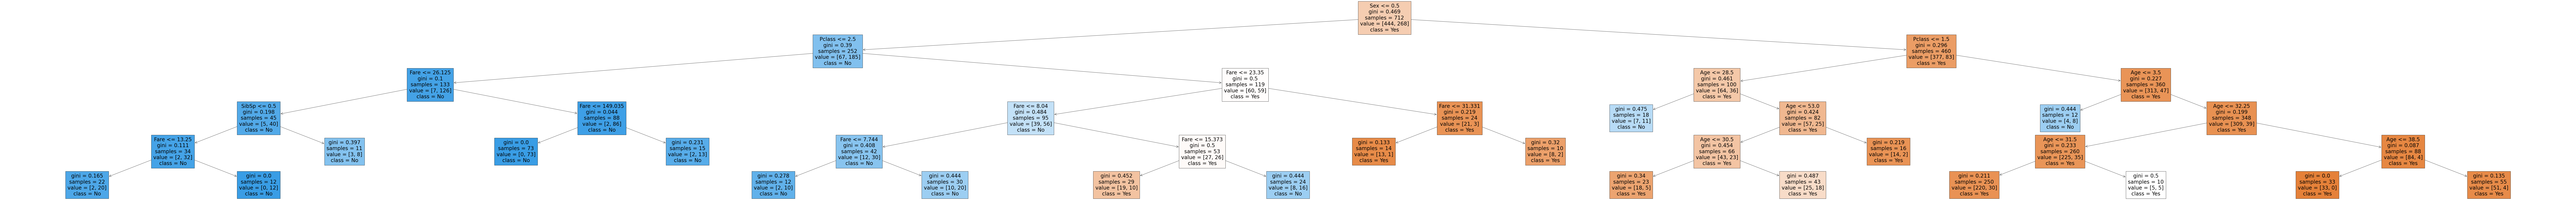

In [89]:
fig = plt.figure(figsize=(250,20))
_ = tree.plot_tree(clf, 
    feature_names=titanic.drop(["Survived", "Name", "Cabin", "Ticket", "PassengerId"], axis=1).columns,
    class_names=["Yes", "No"],
    filled=True)

In [111]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier

rfc=RandomForestClassifier(n_estimators=10, max_depth=3)  #Creating a random forest with 100 decision trees
rfc.fit(x_train, y_train)  #Training our model
y_pred=rfc.predict(x_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8379888268156425


In [112]:
t = rfc.estimators_[2]

fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(t,
    feature_names=titanic.drop(["Survived", "Name", "Cabin", "Ticket", "PassengerId"], axis=1).columns,
    class_names=["Yes", "No"],
    filled=True,
    rounded=True
    )


In [123]:
titanic[(titanic.Sex == 0) & (titanic.SibSp > 2.5) & (titanic.Fare > 31.33)]

PassengerId  Survived  Pclass                               Name  Sex  \
43            72         0       3         Goodwin, Miss. Lillian Amy    0   
108          181         0       3       Sage, Miss. Constance Gladys    0   
491          864         0       3  Sage, Miss. Dorothy Edith "Dolly"    0   
575           89         1       1         Fortune, Miss. Mabel Helen    0   
672          793         0       3            Sage, Miss. Stella Anna    0   
722          342         1       1     Fortune, Miss. Alice Elizabeth    0   
830          234         1       3     Asplund, Miss. Lillian Gertrud    0   

           Age  SibSp  Parch    Ticket      Fare        Cabin  Embarked  
43   16.000000      5      2   CA 2144   46.9000          NaN         1  
108  29.699118      8      2  CA. 2343   69.5500          NaN         1  
491  29.699118      8      2  CA. 2343   69.5500          NaN         1  
575  23.000000      3      2     19950  263.0000  C23 C25 C27         1  
672  29.699118      8      2  CA. 2343   69.5500          NaN         1  
722  24.000000      3      2     19950  263.0000  C23 C25 C27         1  
830   5.000000      4      2    347077   31.3875          NaN         1

In [130]:
titanic[(titanic.Sex == 1) & (titanic.Fare > 7.91) & (titanic.SibSp > 1.5)].Survived.sum()

4